In [1]:
import numpy as np
import pandas as pd 

In [6]:
#path="http://localhost:8888/edit/A1_Clean.csv"
df = pd.read_csv("A1_Clean.csv")
df.head(5)  

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [7]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [8]:
df.shape

(201, 26)

#Data Normalization
#Why normalization?

Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.

Example

To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height".

Target: would like to normalize those variables so their value ranges from 0 to 1

Approach: replace original value by (original value)/(maximum value)

In [9]:
#Approach: replace original value by (original value)/(maximum value)
df['length']=df['length']/df['length'].max()
df['width']=df['width']/df['width'].max()
df['height']=df['height']/df['height'].max()

In [13]:
df['length'], df['height'], df['width']

(0      0.811148
 1      0.811148
 2      0.822681
 3      0.848630
 4      0.848630
          ...   
 196    0.907256
 197    0.907256
 198    0.907256
 199    0.907256
 200    0.907256
 Name: length, Length: 201, dtype: float64, 0      0.816054
 1      0.816054
 2      0.876254
 3      0.908027
 4      0.908027
          ...   
 196    0.928094
 197    0.928094
 198    0.928094
 199    0.928094
 200    0.928094
 Name: height, Length: 201, dtype: float64, 0      0.890278
 1      0.890278
 2      0.909722
 3      0.919444
 4      0.922222
          ...   
 196    0.956944
 197    0.955556
 198    0.956944
 199    0.956944
 200    0.956944
 Name: width, Length: 201, dtype: float64)

In [14]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [16]:
df[['length','width','height']]

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027
...,...,...,...
196,0.907256,0.956944,0.928094
197,0.907256,0.955556,0.928094
198,0.907256,0.956944,0.928094
199,0.907256,0.956944,0.928094


#Binning
Why binning?
Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.

Example:

In our dataset, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis?

We will use the pandas method 'cut' to segment the 'horsepower' column into 3 bins.

#Example of Binning Data In Pandas

#Example of Binning Data In Pandas

In [17]:
df["horsepower"].dtypes

dtype('float64')

In [18]:
df["horsepower"]=df["horsepower"].astype(int, copy=True) # convert data to correct format

Text(0.5, 1.0, 'horsepower bins')

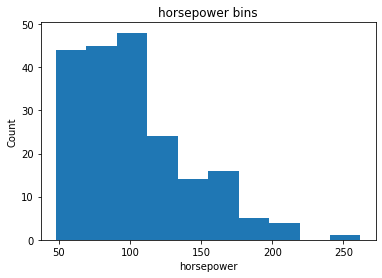

In [21]:
#Let's plot the histogram of horsepower to see what the distribution of horsepower looks like.

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("Count")
plt.pyplot.title("horsepower bins")

(array([153.,  43.,   5.]),
 array([ 48.        , 119.33333333, 190.66666667, 262.        ]),
 <a list of 3 Patch objects>)

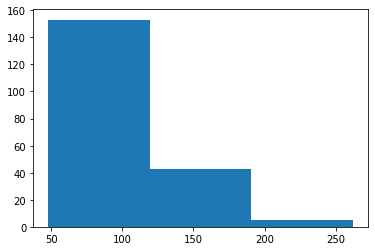

In [34]:
plt.pyplot.hist(df["horsepower"], bins=3)

In [22]:
#We want 3 bins. Low,medium and high(0-low-med-high:4).
#we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated = 4.

bins=np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins


array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [23]:
group_names = ['Low', 'Medium', 'High']

In [28]:
df['horsepower_binned']=pd.cut(df['horsepower'],bins, labels=group_names, include_lowest=True)
df[['horsepower','horsepower_binned']].tail(5)

,horsepower,horsepower_binned
196,114,Low
197,160,Medium
198,134,Medium
199,106,Low
200,114,Low


In [29]:
#Let's see the number of vehicles in each bin:
df['horsepower_binned'].value_counts()

Low       153
Medium     43
High        5
Name: horsepower_binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

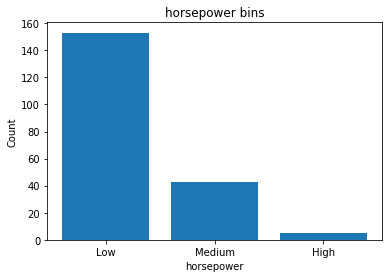

In [33]:
plt.pyplot.bar(group_names,df['horsepower_binned'].value_counts())

plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("Count")
plt.pyplot.title("horsepower bins")